In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
df = pd.read_excel("C:/Users/LENOVO/Downloads/tuik_verisi_hazir.xlsx")


In [4]:
print(df.info())
print("\nAçıklayıcı İstatistikler:\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YIL            14 non-null     int64  
 1   TÜFE (%)       14 non-null     float64
 2   KUR (USD/TRY)  14 non-null     float64
 3   FAİZ (%)       14 non-null     float64
 4   İŞSİZLİK (%)   14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 692.0 bytes
None

Açıklayıcı İstatistikler:

             YIL   TÜFE (%)  KUR (USD/TRY)   FAİZ (%)  İŞSİZLİK (%)
count    14.0000  14.000000      14.000000  14.000000     14.000000
mean   2016.5000  19.450000       6.050000  11.482143     10.714286
std       4.1833  18.617434       6.345895   7.479115      1.553585
min    2010.0000   6.200000       1.500000   4.500000      8.400000
25%    2013.2500   8.275000       2.075000   6.750000      9.525000
50%    2016.5000  11.200000       3.350000   8.125000     10.650000
75%    2019.7500  19.02500

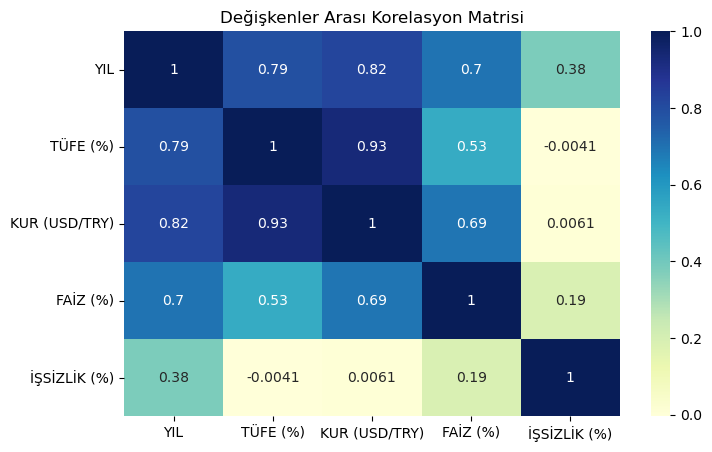

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# X ve y'yi tanımla
X = df[["KUR (USD/TRY)", "FAİZ (%)", "İŞSİZLİK (%)"]]
y = df["TÜFE (%)"]

# Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Tahmin yap
y_pred = model.predict(X)

# Performans metrikleri
print("R^2 Skoru:", r2_score(y, y_pred))
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y, y_pred))


R^2 Skoru: 0.8951570330443368
Ortalama Mutlak Hata (MAE): 4.676612894766749


<function matplotlib.pyplot.show(close=None, block=None)>

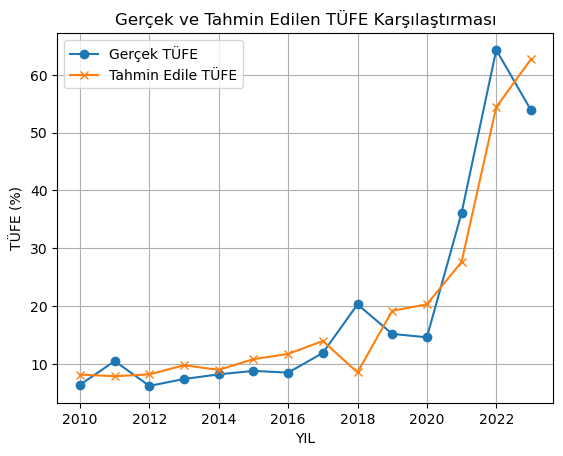

In [12]:
plt.plot(df["YIL"], y, label="Gerçek TÜFE", marker="o")
plt.plot(df["YIL"], y_pred, label="Tahmin Edile TÜFE", marker="x")
plt.xlabel("YIL")
plt.ylabel("TÜFE (%)")
plt.title("Gerçek ve Tahmin Edilen TÜFE Karşılaştırması")
plt.legend()
plt.grid(True)
plt.show